## Observations and Insights 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mouse_data_combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [40]:
# Checking the number of mice.
# mouse_data_combined['Mouse ID'].value_counts().head()
num_of_mice = mouse_data_combined_df["Mouse ID"].count()
num_of_mice

1893

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice_id = mouse_data_combined_df["Mouse ID"]
time_point = mouse_data_combined_df["Timepoint"]

dup_mice_id_time_point_df = pd.DataFrame({"Mouse ID": dup_mice_id, "Timepoint":time_point})
dup_mice_id_time_point_df

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = mouse_data_combined_df.drop_duplicates(["Mouse ID"], keep= "first")
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [43]:
# Checking the number of mice in the clean DataFrame.
clean_df_mice_count = clean_mice_df["Mouse ID"].count()
clean_df_mice_count

249

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_grouped = mouse_data_combined_df.groupby(["Drug Regimen"])

# Mean
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()

# Median
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()

# Variance
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()

# Standard_dev
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()

# SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()


In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, 
                                      "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_statistics_df
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_2_df = regimen_grouped.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_statistics_2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

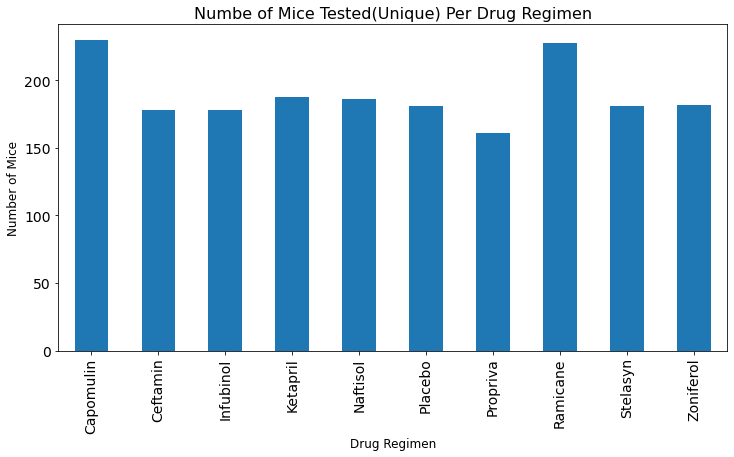

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [73]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

unique_mice_tested = mouse_data_combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

unique_mice_treatment_plot = unique_mice_tested.plot.bar(figsize=(12, 6), fontsize = 14)

plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Number of Mice", fontsize = 12)
plt.title("Numbe of Mice Tested(Unique) Per Drug Regimen", fontsize=16)

plt.show()
unique_mice_tested

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

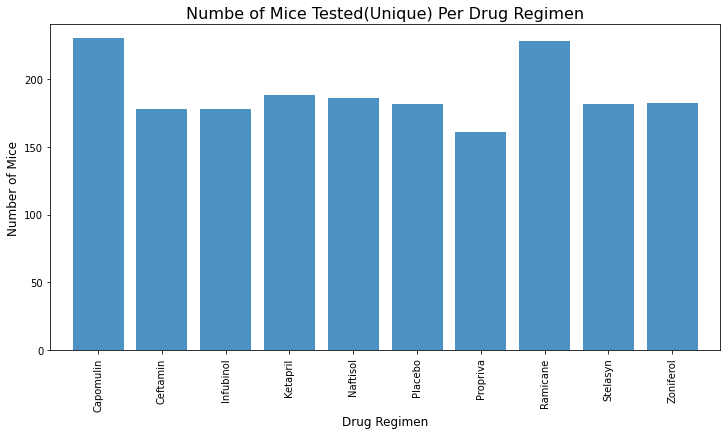

In [55]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

unique_mice_tested_py = mouse_data_combined_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()

x_axis = np.arange(len(unique_mice_tested_py))

fig1, ax1 = plt.subplots(figsize=(12, 6))
plt.bar(x_axis, unique_mice_tested_py, alpha=0.8, align='center')

x_axis_loc = [value for value in x_axis]

# Label them alphabetically
plt.xticks(x_axis_loc, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 
                        'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(unique_mice_tested_py)+10)

plt.title("Numbe of Mice Tested(Unique) Per Drug Regimen", fontsize = 16)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
unique_mice_tested_py


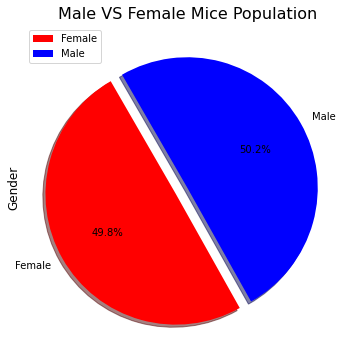

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender_groupby = mouse_data_combined_df.groupby(["Mouse ID", "Sex"])
mice_gender_groupby_df = pd.DataFrame(mice_gender_groupby.size())

mice_gender_df = pd.DataFrame(mice_gender_groupby_df.groupby(["Sex"]).count())
mice_gender_df.columns = ["Total Count"]
mice_gender_df["Percentage Of Sex"] = (100*(mice_gender_df["Total Count"]/mice_gender_df["Total Count"].sum()))
mice_gender_df["Percentage Of Sex"] = mice_gender_df["Percentage Of Sex"]

colors = ['red', 'blue']
explode = (0.1, 0)
panda_pie_plot = mice_gender_df.plot.pie(y="Total Count", figsize=(12,6), colors = colors, startangle=120, explode = explode, 
                                         shadow = True, autopct="%1.1f%%")

plt.title("Male VS Female Mice Population", fontsize = 16)
plt.ylabel("Gender", fontsize = 12)
#plt.axis("auto", fontsize = 12)
plt.show()

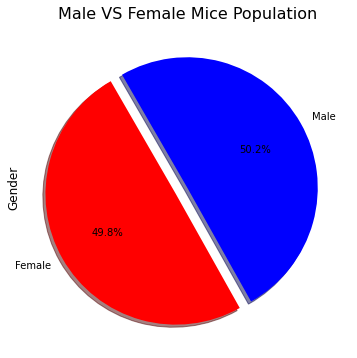

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]

Mice_percentages = mice_gender_df["Percentage Of Sex"]

colors = ['red', 'blue']

explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12, 6))
plt.pie(Mice_percentages, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)

plt.title("Male VS Female Mice Population", fontsize = 16)
plt.ylabel("Gender", fontsize = 12)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
